<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_1_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.376939,96.872082,79.653035,89.863258,0.008896,315.774211,315.760856,0.013355
1,0.0,1.0,43.682010,48.059941,61.460339,59.320835,-0.009060,222.514064,222.533172,-0.019108
2,0.0,2.0,88.778130,34.562947,52.792236,35.785294,0.034512,221.953119,221.927772,0.025347
3,0.0,3.0,44.667711,97.006247,91.378809,95.322647,-0.027493,338.347920,338.368724,-0.020804
4,0.0,4.0,53.926301,30.875153,55.465876,23.089655,-0.076146,173.280840,173.371224,-0.090385
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.529179,76.678950,44.801739,55.910227,0.018584,259.938679,259.924380,0.014298
119996,999.0,116.0,83.804318,87.266832,63.637361,81.644099,-0.037305,326.315306,326.361317,-0.046011
119997,999.0,117.0,30.392502,77.147831,89.590768,50.484778,0.008325,257.624204,257.595228,0.028975
119998,999.0,118.0,20.704540,72.663164,77.155135,99.226779,-0.015972,279.733645,279.740181,-0.006536


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.376939,96.872082,79.653035,89.863258,0.008896,315.774211,315.760856,0.013355
1,0.0,1.0,43.682010,48.059941,61.460339,59.320835,-0.009060,222.514064,222.533172,-0.019108
2,0.0,2.0,88.778130,34.562947,52.792236,35.785294,0.034512,221.953119,221.927772,0.025347
3,0.0,3.0,44.667711,97.006247,91.378809,95.322647,-0.027493,338.347920,338.368724,-0.020804
4,0.0,4.0,53.926301,30.875153,55.465876,23.089655,-0.076146,173.280840,173.371224,-0.090385
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.529179,76.678950,44.801739,55.910227,0.018584,259.938679,259.924380,0.014298
119996,999.0,116.0,83.804318,87.266832,63.637361,81.644099,-0.037305,326.315306,326.361317,-0.046011
119997,999.0,117.0,30.392502,77.147831,89.590768,50.484778,0.008325,257.624204,257.595228,0.028975
119998,999.0,118.0,20.704540,72.663164,77.155135,99.226779,-0.015972,279.733645,279.740181,-0.006536


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.376939  96.872082  79.653035  89.863258  0.008896  315.774211   
      1.0    43.682010  48.059941  61.460339  59.320835 -0.009060  222.514064   
      2.0    88.778130  34.562947  52.792236  35.785294  0.034512  221.953119   
      3.0    44.667711  97.006247  91.378809  95.322647 -0.027493  338.347920   
      4.0    53.926301  30.875153  55.465876  23.089655 -0.076146  173.280840   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.529179  76.678950  44.801739  55.910227  0.018584  259.938679   
      116.0  83.804318  87.266832  63.637361  81.644099 -0.037305  326.315306   
      117.0  30.392502  77.147831  89.590768  50.484778  0.008325  257.624204   
      118.0  20.704540  72.663164  77.155135  99.226779 -0.015972  279.733645   
      119.0  58.626658  53.417164  58.144761  47.355903  0.021366  227.565853   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    315.760856  0.013355  
      1.0    222.533172 -0.019108  
      2.0    221.927772  0.025347  
      3.0    338.368724 -0.020804  
      4.0    173.371224 -0.090385  
...                 ...       ...  
999.0 115.0  259.924380  0.014298  
      116.0  326.361317 -0.046011  
      117.0  257.595228  0.028975  
      118.0  279.740181 -0.006536  
      119.0  227.543412  0.022441  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.376939  96.872082  79.653035  89.863258  0.008896  315.774211   
      1.0    43.682010  48.059941  61.460339  59.320835 -0.009060  222.514064   
      2.0    88.778130  34.562947  52.792236  35.785294  0.034512  221.953119   
      3.0    44.667711  97.006247  91.378809  95.322647 -0.027493  338.347920   
      4.0    53.926301  30.875153  55.465876  23.089655 -0.076146  173.280840   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.529179  76.678950  44.801739  55.910227  0.018584  259.938679   
      116.0  83.804318  87.266832  63.637361  81.644099 -0.037305  326.315306   
      117.0  30.392502  77.147831  89.590768  50.484778  0.008325  257.624204   
      118.0  20.704540  72.663164  77.155135  99.226779 -0.015972  279.733645   
      119.0  58.626658  53.417164  58.144761  47.355903  0.021366  227.565853   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    315.760856  0.013355  
      1.0    222.533172 -0.019108  
      2.0    221.927772  0.025347  
      3.0    338.368724 -0.020804  
      4.0    173.371224 -0.090385  
...                 ...       ...  
999.0 115.0  259.924380  0.014298  
      116.0  326.361317 -0.046011  
      117.0  257.595228  0.028975  
      118.0  279.740181 -0.006536  
      119.0  227.543412  0.022441  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.376939,96.872082,79.653035,89.863258,0.008896,315.774211,315.760856,0.013355
1,0.0,1.0,43.682010,48.059941,61.460339,59.320835,-0.009060,222.514064,222.533172,-0.019108
2,0.0,2.0,88.778130,34.562947,52.792236,35.785294,0.034512,221.953119,221.927772,0.025347
3,0.0,3.0,44.667711,97.006247,91.378809,95.322647,-0.027493,338.347920,338.368724,-0.020804
4,0.0,4.0,53.926301,30.875153,55.465876,23.089655,-0.076146,173.280840,173.371224,-0.090385
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.529179,76.678950,44.801739,55.910227,0.018584,259.938679,259.924380,0.014298
119996,999.0,116.0,83.804318,87.266832,63.637361,81.644099,-0.037305,326.315306,326.361317,-0.046011
119997,999.0,117.0,30.392502,77.147831,89.590768,50.484778,0.008325,257.624204,257.595228,0.028975
119998,999.0,118.0,20.704540,72.663164,77.155135,99.226779,-0.015972,279.733645,279.740181,-0.006536


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.376939  96.872082  79.653035  89.863258  0.008896  315.774211   
      1.0    43.682010  48.059941  61.460339  59.320835 -0.009060  222.514064   
      2.0    88.778130  34.562947  52.792236  35.785294  0.034512  221.953119   
      3.0    44.667711  97.006247  91.378809  95.322647 -0.027493  338.347920   
      4.0    53.926301  30.875153  55.465876  23.089655 -0.076146  173.280840   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.529179  76.678950  44.801739  55.910227  0.018584  259.938679   
      116.0  83.804318  87.266832  63.637361  81.644099 -0.037305  326.315306   
      117.0  30.392502  77.147831  89.590768  50.484778  0.008325  257.624204   
      118.0  20.704540  72.663164  77.155135  99.226779 -0.015972  279.733645   
      119.0  58.626658  53.417164  58.144761  47.355903  0.021366  227.565853   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    315.760856  0.013355  
      1.0    222.533172 -0.019108  
      2.0    221.927772  0.025347  
      3.0    338.368724 -0.020804  
      4.0    173.371224 -0.090385  
...                 ...       ...  
999.0 115.0  259.924380  0.014298  
      116.0  326.361317 -0.046011  
      117.0  257.595228  0.028975  
      118.0  279.740181 -0.006536  
      119.0  227.543412  0.022441  

[120000 rows x 8 columns]

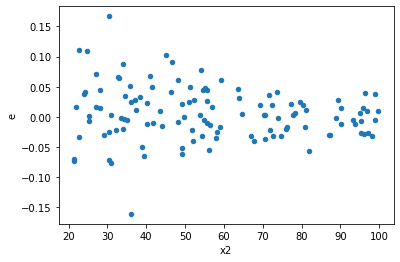

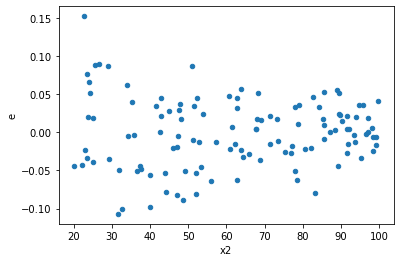

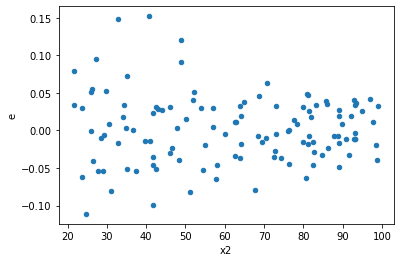

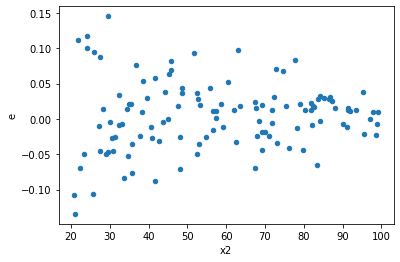

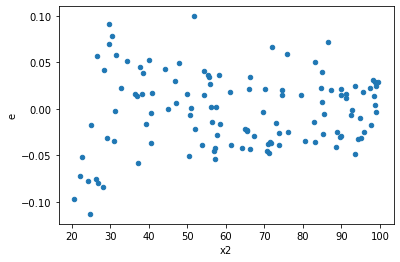

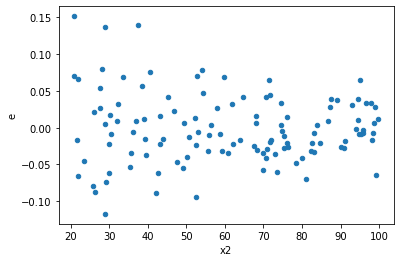

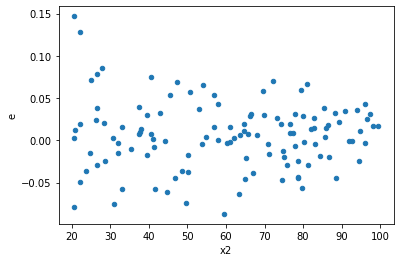

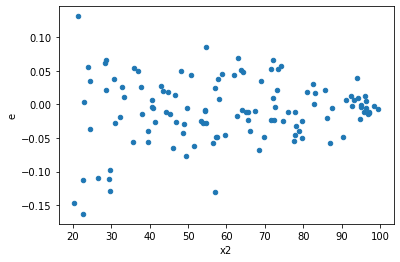

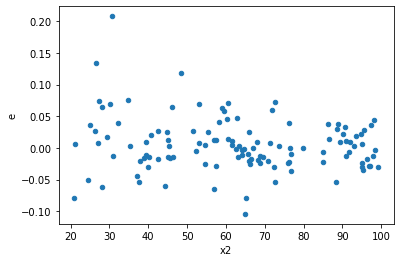

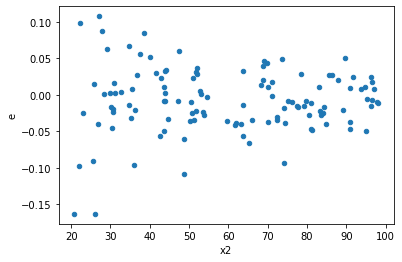

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
65.0,44.0,44.0,0.1380882199911284,0.15165372163238972,0.0031383686361620092,0.003446675491645221,1.098237935445419,0.7573411981427238,0.6213294009286381,0.3786705990713619,Reject005=1 : Homoscedasticity
70.0,44.0,44.0,0.06424613770965631,0.07551442970588032,0.00146013949340128,0.0017162370387700072,1.1753925200476347,0.5942762808355395,0.7028618595822302,0.29713814041776976,Reject005=1 : Homoscedasticity
126.0,44.0,44.0,0.10050140176092406,0.11849363641626749,0.0022841227672937285,0.0026930371912788067,1.1790247134875187,0.587262085189,0.7063689574055,0.2936310425945,Reject005=1 : Homoscedasticity
197.0,44.0,44.0,0.06475461884970664,0.06652265473350305,0.001471695882947878,0.0015118785166705238,1.0273036258293784,0.9292136722349147,0.5353931638825427,0.46460683611745734,Reject005=1 : Homoscedasticity
208.0,44.0,44.0,0.0976799543123086,0.10825973514271187,0.0022199989616433773,0.002460448525970724,1.1083106652218213,0.7345607425262477,0.6327196287368761,0.36728037126312385,Reject005=1 : Homoscedasticity
216.0,44.0,44.0,0.11223087518321864,0.12240082778313516,0.0025507017087095145,0.0027818369950712535,1.0906163529716213,0.7748631396162595,0.6125684301918702,0.38743156980812976,Reject005=1 : Homoscedasticity
219.0,44.0,44.0,0.047479174608339905,0.05345283754215083,0.0010790721501895432,0.0012148372168670643,1.1258164865562266,0.696013050475079,0.6519934747624605,0.3480065252375395,Reject005=1 : Homoscedasticity
224.0,44.0,44.0,0.10463115424057351,0.1143710130541549,0.0023779807781948523,0.002599341205776248,1.0930875596687675,0.7691552610982964,0.6154223694508518,0.3845776305491482,Reject005=1 : Homoscedasticity
252.0,44.0,44.0,0.06187255485666274,0.0771862150400001,0.0014061944285605167,0.0017542321600000023,1.2475032786154348,0.46627064637069937,0.7668646768146503,0.23313532318534969,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.1132162494425053,0.04751607836017773,0.0025730965782387568,0.001079910871822221,0.41969309700819807,0.004796723482211841,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,0.10744722111997967,0.04336584773050566,0.0024419822981813564,0.0009855874484205832,0.4036013893936046,0.0032460008518188045,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,0.1189605189984878,0.06206580235701821,0.002703648159056541,0.0014105864172049593,0.5217344618159171,0.03340482119761388,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,0.15982568467052585,0.04172230843794389,0.003632401924330133,0.000948234282680543,0.26104883282028624,1.8806959171793104e-05,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,0.09745569005503779,0.05147245807050983,0.0022149020467054042,0.001169828592511587,0.5281626762012657,0.03681559209266593,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,0.11951626367388643,0.055036908889225314,0.0027162787198610552,0.0012508388383914845,0.4604972344132152,0.011521110099487336,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,0.07925333439360782,0.06291152609776689,0.0018012121453092687,0.0014298074113128839,0.7938028927000076,0.4468375743401245,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,0.1669274889269236,0.05118585980368631,0.003793806566520991,0.0011633149955383253,0.30663529495788505,0.00014847130135010262,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,0.11691915511604956,0.0482677550490709,0.0026572535253647626,0.0010969944329334296,0.41283017313255593,0.004074595760189286,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    588
Reject005=1 : Homoscedasticity      412
Name: Result_test, dtype: int64